##Boston Data 
### 1-fold Cross-Validation

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import KFold
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
import numpy as np
from sklearn.datasets import load_boston
import sklearn as sk
import math
import pdb
import matplotlib.pyplot as plt
%matplotlib inline

Attribute Information of the Boston Data (in order):
- CRIM     per capita crime rate by town
- ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS    proportion of non-retail business acres per town
- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX      nitric oxides concentration (parts per 10 million)
- RM       average number of rooms per dwelling
- AGE      proportion of owner-occupied units built prior to 1940
- DIS      weighted distances to five Boston employment centres
- RAD      index of accessibility to radial highways
- TAX      full-value property-tax rate per 10,000 dollars
- PTRATIO  pupil-teacher ratio by town
- B        1000 x (Bk - 0.63) ^ 2 where Bk is the proportion of blacks by town
- LSTAT    percentage lower status of the population
- MEDV     Median value of owner-occupied homes in $1000's

In [2]:
boston = load_boston()
features = boston.data
target = boston.target # housing price

In [3]:
# split the data into train and test
train_feature, test_feature, train_target, test_target = \
train_test_split(features, target, test_size=0.3)
linear = LinearRegression()
linear.fit(train_feature, train_target)
# You can call predict to get the predicted values for training and test
train_predicted = linear.predict(train_feature)
test_predicted = linear.predict(test_feature)

In [4]:
def mse(target, predicted):
    return 'own calcuation: ', np.mean(((predicted - target)**2))

print mse(train_target, train_predicted)

('own calcuation: ', 19.749866728209614)


In [5]:
sk.metrics.mean_squared_error(train_target, train_predicted)

19.749866728209614

In [6]:
sk.metrics.mean_squared_error(test_target, test_predicted)
# mean squared error for test data is higher because the model was not trained on the test set

27.825172220793537

In [7]:
# Evaluating MSE on the entire data set would underestimate the MSE because
# the data is trained by the entire data set. Therefore, we need to evaluate MSE on a seperate
# test set to evaluate the fit of the model

###K-fold cross-validation

In K-fold cross validation, the data is split into **k** groups. One group
out of the k groups will be the test set, the rest (**k-1**) groups will
be the training set. In the next iteration, another group will be the test set,
and the rest will be the training set. The process repeats for k iterations (k-fold).
In each fold, a metric for accuracy (MSE in this case) will be calculated and
an overall average of that metric will be calculated over k-folds.

<div align="center">
    <img height="300" src="images/kfold.png">
</div>

<br>

A few notes:

* stratified K-fold preserves the percentage of each class, so it's good for binary or multiclass responses data

In [8]:
print train_feature.shape, train_target.shape

(354, 13) (354,)


In [9]:
train_target = train_target[:,np.newaxis]

In [10]:
def k_fold (feature, target, k):
    nrows = feature.shape[0] # get number of rows
    indexes = [i%k for i in range(nrows)] # get an index array of [1,2,3,..,k,1,2,3,..,k]
    np.random.RandomState(42) # set seed
    np.random.shuffle(indexes, ) # shuffle indexes
    mse = []
#     pdb.set_trace()
    for i in range(k):
        validation_mask = np.array(map(lambda x: x == i, indexes))
        print np.arange(nrows)[validation_mask]
        # select the set i that is equal to k
        validation_feature = feature[validation_mask]
        validation_target = target[validation_mask]
        train_feature = feature[~validation_mask]
        train_target = target[~validation_mask]
        linear.fit(train_feature, train_target)
        validation_predicted = linear.predict(validation_feature)
        mse.append(sk.metrics.mean_squared_error(validation_target, \
                                      validation_predicted))
        
    return mse

In [11]:
k_fold(train_feature, train_target, 10)
# though the validation set does not exactly line up with the sklearn implementation
# the mse is close enough

[ 15  23  30  31  45  51  54  64  76  85  87  89  92  93 108 119 133 165
 166 177 183 200 235 237 253 254 256 265 270 273 283 318 325 339 345 346]
[  4  16  29  38  52  75 101 128 129 134 139 162 167 171 193 205 213 238
 246 249 252 258 263 267 274 282 289 302 306 316 322 323 330 342 348 351]
[ 10  49  57  68  70  81  83  86  98 102 107 112 116 118 130 141 144 161
 163 168 179 195 211 214 219 231 234 245 257 286 288 292 295 315 334 338]
[  0   6  20  33  44  47  48  62  74  97 111 121 126 142 143 149 151 160
 172 196 199 220 226 229 236 247 251 272 275 287 297 310 331 336 349 353]
[  2   7  19  24  39  56  59  60  65  71  88  96  99 100 104 106 124 146
 152 153 155 170 181 185 227 239 240 290 298 304 305 317 328 340 347]
[ 17  21  32  36  37  53  66  69  77  79  82 103 132 136 138 158 184 191
 194 197 206 210 212 221 230 242 264 269 271 278 285 296 313 326 329]
[ 13  18  25  34  35  40  46  50  55  61  72  84 105 113 131 169 174 176
 180 186 188 192 203 208 228 233 243 244 268 276 308 

[9.6682015690795762,
 31.257726026643255,
 30.910485468588426,
 21.52897472114153,
 15.678507137221592,
 19.777370827415346,
 25.970625852349514,
 14.935024889792096,
 33.33140096287098,
 17.316925780339041]

In [15]:
nrows = train_feature.shape[0] # get number of rows
cv_gen = sk.cross_validation.KFold(n=nrows, n_folds=10, shuffle=True, random_state=42)

In [16]:
for fold in cv_gen:
    print fold[1]

[  9  15  25  33  39  42  56  57  73  82 119 126 139 140 145 147 158 168
 181 199 209 220 237 253 272 277 281 286 298 305 319 332 335 338 341 350]
[  3   5  22  30  45  46  55  63  72  76  77  78  84  90  93  94 172 177
 183 185 193 195 222 225 231 238 242 244 247 275 285 301 327 342 345 352]
[  7  16  17  24  60  66  75 101 108 109 110 113 114 116 137 155 157 163
 180 182 194 203 223 227 233 250 265 289 292 296 310 311 314 329 343 349]
[  6  10  18  19  31  36  59  79  81 104 111 118 124 132 148 152 153 167
 175 176 179 224 245 248 255 261 262 267 268 274 284 318 328 331 334 336]
[ 11  23  37  38  67  68  69  86  92  96  97 112 122 125 129 143 144 146
 165 173 197 210 229 232 234 246 249 254 280 282 283 290 291 299 300]
[  2  29  44  74  83 107 115 117 120 127 133 154 164 184 196 198 202 208
 211 219 228 239 240 256 258 287 294 297 309 312 316 320 325 326 340]
[  0   4  12  26  28  35  41  51  65  70  85  89  95 123 131 136 141 142
 150 159 170 178 186 204 206 221 266 271 295 303 317 

In [17]:
# sklearn's implementation of k-fold cross validation
# there is no option to set seed in cross_val_score, hence i passed in a cv_generator
sk.cross_validation.cross_val_score(LinearRegression(), train_feature,
                                    train_target, cv=cv_gen, 
                                    scoring='mean_squared_error')

array([-12.91900623,  -9.05682113, -21.78241174, -16.47391365,
       -34.75531698, -51.25951476, -19.19565792, -20.27782471,
       -24.42436647, -25.3838019 ])

In [18]:
mse_test = []
mse_training = []
N_range = range(10, train_feature.shape[0], 10) 

for i in N_range:
    train_feature_lim = train_feature[0:i]
    train_target_lim = train_target[0:i]
    linear = LinearRegression()
    linear.fit(train_feature_lim, train_target_lim)
    # You can call predict to get the predicted values for training and test
    train_predicted_lim = linear.predict(train_feature_lim)
    test_predicted = linear.predict(test_feature)
    
    mse_test.append(sk.metrics.mean_squared_error(test_target, test_predicted))
    mse_training.append(sk.metrics.mean_squared_error(train_target_lim, train_predicted_lim))

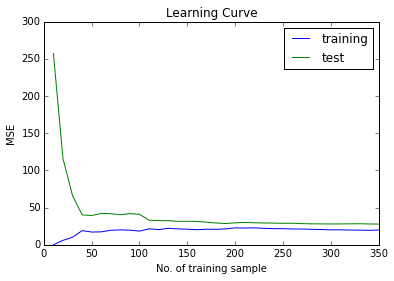

In [19]:
plt.plot(N_range, mse_training, label='training')
plt.plot(N_range, mse_test, label='test')
plt.ylabel('MSE')
plt.xlabel('No. of training sample')
plt.title('Learning Curve')
plt.legend()
plt.show()

# Learning curve is a plot of the training and cross-validation error as a function of 
# the number of training points. Note that when we train on a small subset of the 
# training data, the training error is computed using this subset, not the full 
# training set. These plots can give a quantitative view into how beneficial it 
# will be to add training samples. 

# The conclusion we can draw here is that linear regression is a high-bias (low-variance) 
# estimator which underfits the data. This is indicated by the fact that both the training 
# and cross-validation errors converge quickly. In this case, adding more training data 
# will not help.

##Stepwise Regression (Feature Selection)

- use sklearn reverse feature elimination (a greedy feature elimination algorithm) for sequential backward feature selection. 

In [20]:
from sklearn.datasets import make_friedman1
X, y = make_friedman1(n_samples=5000, n_features=100, random_state=0)

In [25]:
X.shape, y.shape

((5000, 100), (5000,))

In [38]:
r_squared_lst = []
adj_r_squared_lst = []

In [39]:
for n in xrange(1,101):
    selector = sk.feature_selection.RFE(LinearRegression(), n_features_to_select=n, step=1)
    selector.fit(X,y)
    r_squared = selector.score(X,y)
    n_sample_size = X.shape[0]
    r_squared_lst.append(r_squared)
    # adjusted r_squared to take into account model complexity
    adj_r_squared = 1 - ((1 - r_squared)*(n_sample_size - 1))/(n_sample_size - n - 1)
    adj_r_squared_lst.append(adj_r_squared)
    print r_squared, adj_r_squared

0.325179544275 0.325044526177
0.497063384771 0.496862089347
0.649620465801 0.649410069763
0.742717477559 0.742511445509
0.743083957548 0.742826732836
0.743360389354 0.743051990062
0.743634670843 0.743275184203
0.743880237945 0.743469707371
0.744111764096 0.743650242228
0.744334950438 0.743822492933
0.744545619725 0.743982268044
0.744732446043 0.744118206892
0.744917436021 0.744252359139
0.74510699255 0.744391144585
0.74528480985 0.744518211164
0.745445551619 0.744628198383
0.745595957136 0.744727858234
0.745720683981 0.744801786633
0.745838969034 0.744869278354
0.745946009647 0.744925507577
0.746045897056 0.744974576011
0.746139376149 0.74501722752
0.746237339843 0.745064401503
0.746333641071 0.745109923963
0.746423648703 0.745149139498
0.746513303409 0.745188016035
0.746594825242 0.745218731172
0.746673247533 0.745246341665
0.746744768533 0.745267021709
0.746812209412 0.745283605323
0.74687664568 0.745297172254
0.746938247541 0.745307891978
0.746999643877 0.74531840913
0.747060214726 

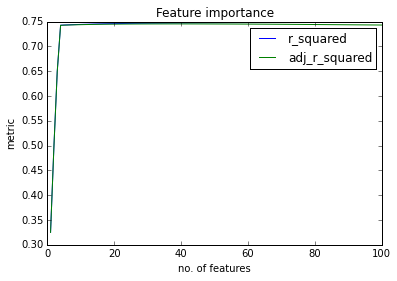

In [40]:
plt.plot(np.arange(1,101), r_squared_lst, label='r_squared')
plt.plot(np.arange(1,101), adj_r_squared_lst, label='adj_r_squared')
plt.ylabel('metric')
plt.xlabel('no. of features')
plt.title('Feature importance')
plt.legend()
plt.show()

In [41]:
# by the shape of the plot, 4 features are enough to predict the target